<a href="https://colab.research.google.com/github/vsjamwal/Algo-trading-Strategies-/blob/main/Sectoral_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload Sector.xlsx
uploaded_file1 = files.upload()

# Upload Share Price.xlsx
uploaded_file2 = files.upload()


Saving Sector.xlsx to Sector.xlsx


Saving Share Price.xlsx to Share Price.xlsx


In [2]:
import io
import pandas as pd
# Read the uploaded files into DataFrames
df_file1 = pd.read_excel(io.BytesIO(next(iter(uploaded_file1.values()))))
df_file2 = pd.read_excel(io.BytesIO(next(iter(uploaded_file2.values()))))

# Merge based on the "Symbol" column
merged_data = pd.merge(df_file1, df_file2, on='Symbol', how='inner')

# Print the merged data to verify
print(merged_data.head())


   Unnamed: 0  Sr. No.     Symbol    Company Name          ISIN  \
0         NaN        1  20MICRONS  20 Microns Ltd  INE144J01027   
1         NaN        1  20MICRONS  20 Microns Ltd  INE144J01027   
2         NaN        1  20MICRONS  20 Microns Ltd  INE144J01027   
3         NaN        1  20MICRONS  20 Microns Ltd  INE144J01027   
4         NaN        1  20MICRONS  20 Microns Ltd  INE144J01027   

  Macro Economic Sector Code Macro Economic Sector Sector Code  \
0                       IN01           Commodities      IN0103   
1                       IN01           Commodities      IN0103   
2                       IN01           Commodities      IN0103   
3                       IN01           Commodities      IN0103   
4                       IN01           Commodities      IN0103   

            Sector Industry Code  ... CAPITALINE CODE     CO_NAME  \
0  Metals & Mining      IN010304  ...           23450  20 Microns   
1  Metals & Mining      IN010304  ...           23450  20 Micr

In [3]:
merged_data

,Unnamed: 0,Sr. No.,Symbol,Company Name,ISIN,Macro Economic Sector Code,Macro Economic Sector,Sector Code,Sector,Industry Code,...,CAPITALINE CODE,CO_NAME,ISIN No,Date_y,Close Price,Total Volume(Adjusted),No. of Trades,Net Turnover -Rs. Thousand,Market Cap,Return Over Previous Day
0,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-03,94.00,183733.0,591.0,17443.08,331.69,-0.32
1,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-04,93.20,63069.0,273.0,5877.30,328.87,-0.85
2,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-05,93.80,36003.0,216.0,3358.62,330.99,0.64
3,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-06,93.45,38420.0,250.0,3586.58,329.75,-0.37
4,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-07,92.70,38214.0,309.0,3561.36,327.11,-0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189316,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-12,768.40,85391.0,3536.0,65733.97,85714.46,1.05
189317,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-13,759.00,179475.0,9910.0,136290.08,84665.89,-1.22
189318,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-15,754.35,273699.0,13944.0,207372.12,84147.19,-0.61
189319,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-16,747.20,388858.0,16436.0,291835.68,83349.61,-0.95


In [4]:
import pandas as pd

def sector_volatility(data, sector_name, price_column='Close Price', symbol_column='Symbol'):
    """
    Calculate and return the volatility of each stock in a given sector.

    Parameters:
    - data: DataFrame containing stock data
    - sector_name: Name of the sector to analyze
    - price_column: Column name containing the stock prices (default is 'Close Price')
    - symbol_column: Column name containing the stock symbols (default is 'Symbol')

    Returns:
    - DataFrame containing stocks in the specified sector and their volatility percentages in descending order
    """
    # Filter data for the specified sector
    sector_data = data[data['Sector'] == sector_name]

    # Calculate volatility for each stock in the sector
    volatility_data = pd.DataFrame(columns=[symbol_column, 'Volatility'])

    for symbol in sector_data[symbol_column].unique():
        stock_data = sector_data[sector_data[symbol_column] == symbol]
        stock_returns = stock_data[price_column].pct_change().dropna()
        volatility = stock_returns.std() * (252**0.5)  # Assuming 252 trading days in a year
        volatility_data = volatility_data.append({symbol_column: symbol, 'Volatility': volatility}, ignore_index=True)

    # Sort the DataFrame by volatility in descending order
    sorted_volatility_data = volatility_data.sort_values(by='Volatility', ascending=False)

    return sorted_volatility_data

# Example usage:
sector_name = 'Automobile and Auto Components'
volatile_stocks = sector_volatility(merged_data, sector_name=sector_name)
volatile_stocks


<ipython-input-4-9bc32dbc91f4>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volatility_data = volatility_data.append({symbol_column: symbol, 'Volatility': volatility}, ignore_index=True)
<ipython-input-4-9bc32dbc91f4>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volatility_data = volatility_data.append({symbol_column: symbol, 'Volatility': volatility}, ignore_index=True)
<ipython-input-4-9bc32dbc91f4>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volatility_data = volatility_data.append({symbol_column: symbol, 'Volatility': volatility}, ignore_index=True)
<ipython-input-4-9bc32dbc91f4>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

,Symbol,Volatility
67,PRITIKA,0.775688
4,ASLIND,0.745145
81,SHIGAN,0.716449
25,GOLDSTAR,0.694881
64,PRECAM,0.684290
...,...,...
94,TATAMOTORS,0.208856
97,TVSMOTOR,0.205017
12,BOSCHLTD,0.178386
49,MARUTI,0.173568


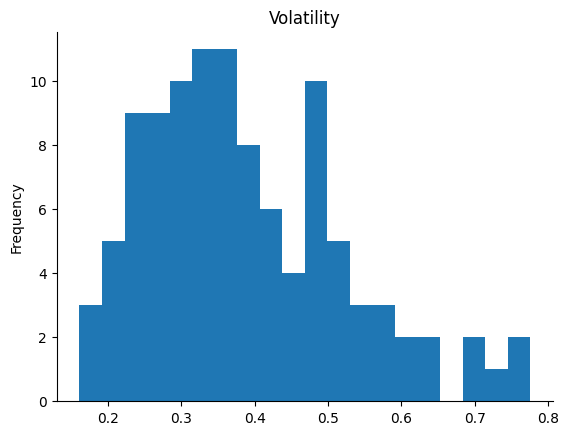

In [5]:
from matplotlib import pyplot as plt
volatile_stocks['Volatility'].plot(kind='hist', bins=20, title='Volatility')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
import pandas as pd

def sector_high_volume(data, sector_name, volume_column='Total Volume(Adjusted)', symbol_column='Symbol'):
    """
    Identify stocks in a given sector with volumes above the average volume from the past 14 days.

    Parameters:
    - data: DataFrame containing stock data
    - sector_name: Name of the sector to analyze
    - volume_column: Column name containing the stock volumes (default is 'Total Volume(Adjusted)')
    - symbol_column: Column name containing the stock symbols (default is 'Symbol')

    Returns:
    - DataFrame containing stocks in the specified sector with volumes above average in descending order
    """
    # Filter data for the specified sector
    sector_data = data[data['Sector'] == sector_name]

    # Calculate average volume for each stock over the past 14 days
    sector_data['Average_Volume_14d'] = sector_data.groupby(symbol_column)[volume_column].transform(
        lambda x: x.rolling(window=14, min_periods=1).mean()
    )

    # Filter stocks with volumes above the average
    high_volume_data = sector_data[sector_data[volume_column] > sector_data['Average_Volume_14d']]

    # Sort the DataFrame by volume in descending order
    sorted_high_volume_data = high_volume_data.sort_values(by=volume_column, ascending=False)

    return sorted_high_volume_data

# Example usage:
sector_name = 'Automobile and Auto Components'
high_volume_stocks = sector_high_volume(merged_data, sector_name=sector_name)
high_volume_stocks


<ipython-input-6-176d0189fd9f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_data['Average_Volume_14d'] = sector_data.groupby(symbol_column)[volume_column].transform(


,Unnamed: 0,Sr. No.,Symbol,Company Name,ISIN,Macro Economic Sector Code,Macro Economic Sector,Sector Code,Sector,Industry Code,...,CO_NAME,ISIN No,Date_y,Close Price,Total Volume(Adjusted),No. of Trades,Net Turnover -Rs. Thousand,Market Cap,Return Over Previous Day,Average_Volume_14d
109741,NaN,1192,MOTHERSON,Samvardhana Motherson International Ltd.,INE775A01035,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Samvardh. Mothe.,INE775A01035,2023-07-05,90.30,60717634.0,146971.0,5526500.70,61191.08,6.05,2.468674e+07
166752,NaN,1819,TATAMOTORS,Tata Motors Ltd.,INE155A01022,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020101,...,Tata Motors,INE155A01022,2023-08-10,618.25,53116980.0,279839.0,32158684.03,225937.90,-0.69,1.568553e+07
109768,NaN,1192,MOTHERSON,Samvardhana Motherson International Ltd.,INE775A01035,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Samvardh. Mothe.,INE775A01035,2023-08-11,97.65,46969268.0,138693.0,4674951.83,66171.75,1.93,1.298022e+07
110794,NaN,1204,MSUMI,Motherson Sumi Wiring India Ltd.,INE0FS801015,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Motherson Wiring,INE0FS801015,2023-07-25,61.90,41088343.0,62275.0,2474085.24,27366.66,6.82,9.009688e+06
109747,NaN,1192,MOTHERSON,Samvardhana Motherson International Ltd.,INE775A01035,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Samvardh. Mothe.,INE775A01035,2023-07-13,95.05,34521514.0,113311.0,3302037.27,64409.89,2.04,1.948666e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124694,NaN,1356,PAVNAIND,Pavna Industries Ltd.,INE07S101020,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Pavna Industries,INE07S101020,2023-08-14,316.70,471.0,50.0,148.75,385.77,2.39,2.767857e+02
124696,NaN,1356,PAVNAIND,Pavna Industries Ltd.,INE07S101020,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Pavna Industries,INE07S101020,2023-08-17,327.20,433.0,113.0,139.94,398.56,-1.77,4.182143e+02
124666,NaN,1356,PAVNAIND,Pavna Industries Ltd.,INE07S101020,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Pavna Industries,INE07S101020,2023-07-05,324.60,352.0,29.0,113.93,395.39,2.09,3.460000e+02
124665,NaN,1356,PAVNAIND,Pavna Industries Ltd.,INE07S101020,IN02,Consumer Discretionary,IN0201,Automobile and Auto Components,IN020102,...,Pavna Industries,INE07S101020,2023-07-04,317.95,349.0,23.0,111.27,387.29,-4.72,3.430000e+02


In [7]:
merged_data


,Unnamed: 0,Sr. No.,Symbol,Company Name,ISIN,Macro Economic Sector Code,Macro Economic Sector,Sector Code,Sector,Industry Code,...,CAPITALINE CODE,CO_NAME,ISIN No,Date_y,Close Price,Total Volume(Adjusted),No. of Trades,Net Turnover -Rs. Thousand,Market Cap,Return Over Previous Day
0,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-03,94.00,183733.0,591.0,17443.08,331.69,-0.32
1,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-04,93.20,63069.0,273.0,5877.30,328.87,-0.85
2,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-05,93.80,36003.0,216.0,3358.62,330.99,0.64
3,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-06,93.45,38420.0,250.0,3586.58,329.75,-0.37
4,NaN,1,20MICRONS,20 Microns Ltd,INE144J01027,IN01,Commodities,IN0103,Metals & Mining,IN010304,...,23450,20 Microns,INE144J01027,2023-07-07,92.70,38214.0,309.0,3561.36,327.11,-0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189316,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-12,768.40,85391.0,3536.0,65733.97,85714.46,1.05
189317,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-13,759.00,179475.0,9910.0,136290.08,84665.89,-1.22
189318,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-15,754.35,273699.0,13944.0,207372.12,84147.19,-0.61
189319,NaN,2062,ADANIENSOL,ADANIENSOL,INE768C01010,IN04,Fast Moving Consumer Goods,IN0401,Power,IN040104,...,66273,Adani Energy Sol,INE931S01010,2023-11-16,747.20,388858.0,16436.0,291835.68,83349.61,-0.95


In [8]:
selected_stocks = [
    "ADANIENT", "SBILIFE", "HDFCLIFE", "HINDALCO", "JSWSTEEL", "TITAN", "RELIANCE", "TATASTEEL", "HEROMOTOCO",
    "SUNPHARMA", "DRREDDY", "M&M", "BAJAJFINSV", "BAJFINANCE", "DIVISLAB", "HDFCBANK", "UPL", "BHARTIARTL", "TATAMOTORS",
    "BAJAJ-AUTO", "ULTRACEMCO", "CIPLA", "TCS", "ADANIPORTS", "INFY", "GRASIM", "AXISBANK", "WIPRO", "ICICIBANK",
    "COALINDIA", "ITC", "APOLLOHOSP", "HINDUNILVR", "HCLTECH", "NESTLEIND", "EICHERMOT", "ASIANPAINT", "LTIM", "SBIN",
    "TECHM", "POWERGRID", "TATACONSUM", "MARUTI", "BRITANNIA", "LT", "ONGC", "KOTAKBANK", "INDUSINDBK", "NTPC", "BPCL"
]


In [9]:
import pandas as pd

def calculate_volatility_return_ratio_selected_stocks(data, selected_stocks, price_column='Close Price', symbol_column='Symbol', date_column='Date_x', months=3):
    result_data = pd.DataFrame()

    for symbol in selected_stocks:
        stock_data = data[data[symbol_column] == symbol].sort_values(by=date_column)

        # Ensure 'Date_x' column is of type datetime
        stock_data[date_column] = pd.to_datetime(stock_data[date_column])

        # Calculate volatility
        stock_data['Daily Return'] = stock_data[price_column].pct_change()
        volatility = stock_data['Daily Return'].std()

        # Calculate return in the last X months
        end_date = stock_data[date_column].max()
        start_date = end_date - pd.DateOffset(months=months)
        filtered_data = stock_data[(stock_data[date_column] >= start_date) & (stock_data[date_column] <= end_date)]
        total_return = (filtered_data[price_column].iloc[-1] / filtered_data[price_column].iloc[0]) - 1

        # Calculate ratio (return/volatility)
        ratio = total_return / volatility

        # Append results to the DataFrame
        result_data = result_data.append({
            symbol_column: symbol,
            'Volatility': volatility,
            'Return': total_return,
            'Ratio': ratio
        }, ignore_index=True)

    # Sort the DataFrame by Ratio in descending order
    result_data = result_data.sort_values(by='Ratio', ascending=False)

    return result_data

# Example usage:
result_df_selected_stocks = calculate_volatility_return_ratio_selected_stocks(merged_data, selected_stocks)



<ipython-input-9-a5f9f8bfd1ad>:18: UserWarning: Discarding nonzero nanoseconds in conversion.
  start_date = end_date - pd.DateOffset(months=months)
<ipython-input-9-a5f9f8bfd1ad>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append({
<ipython-input-9-a5f9f8bfd1ad>:18: UserWarning: Discarding nonzero nanoseconds in conversion.
  start_date = end_date - pd.DateOffset(months=months)
<ipython-input-9-a5f9f8bfd1ad>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append({
<ipython-input-9-a5f9f8bfd1ad>:18: UserWarning: Discarding nonzero nanoseconds in conversion.
  start_date = end_date - pd.DateOffset(months=months)
<ipython-input-9-a5f9f8bfd1ad>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [10]:
result_df_selected_stocks

,Symbol,Volatility,Return,Ratio
9,SUNPHARMA,0.018387,0.156774,8.526150
29,COALINDIA,0.066178,0.490395,7.410266
45,ONGC,0.029130,0.205341,7.049078
44,LT,0.037995,0.266885,7.024134
21,CIPLA,0.036226,0.247155,6.822554
19,BAJAJ-AUTO,0.032702,0.221411,6.770596
48,NTPC,0.046733,0.315556,6.752355
8,HEROMOTOCO,0.022710,0.150410,6.623149
18,TATAMOTORS,0.023383,0.153605,6.569043
3,HINDALCO,0.026997,0.169388,6.274414


In [11]:
!pip install pandas numpy matplotlib PyPortfolioOpt
import os
import pandas as pd
from pypfopt import HRPOpt
import yfinance as yf
from pypfopt import expected_returns
import matplotlib.pyplot as plt

if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.7 MB/s eta 0:00:00


In [12]:
tickers = result_df_selected_stocks["Symbol"]
# Extract the first 10 values from the "Symbol" column
tickers = tickers.head(10)


In [13]:
import yfinance as yf

# Assuming you already have the first_10_symbols from the previous steps
first_10_symbols = tickers.head(10).tolist()

# Adding ".NS" to each symbol
tickers_with_ns = [symbol + ".NS" for symbol in first_10_symbols]

# Download historical stock prices
ohlc = yf.download(tickers_with_ns, period="5Y")

# Extract adjusted close prices
prices = ohlc["Adj Close"]

# Display the result
prices


[*********************100%%**********************]  10 of 10 completed


,BAJAJ-AUTO.NS,CIPLA.NS,COALINDIA.NS,HEROMOTOCO.NS,HINDALCO.NS,LT.NS,NTPC.NS,ONGC.NS,SUNPHARMA.NS,TATAMOTORS.NS
Date,,,,,,,,,,
2018-12-03,2243.402100,521.628235,149.458191,2596.813232,225.152618,1316.614258,95.137047,102.401451,433.598877,174.904877
2018-12-04,2266.237793,531.996582,151.408936,2621.800049,225.442459,1309.604736,94.020897,105.024361,421.697327,175.203949
2018-12-05,2266.442627,514.472717,147.237335,2607.576660,213.849091,1286.454468,92.609253,103.263794,393.181091,168.674286
2018-12-06,2228.724854,501.670532,144.416214,2585.579834,210.516006,1272.342773,91.788551,100.712708,400.036438,162.144638
2018-12-07,2284.563721,500.015442,142.105316,2619.792480,211.385513,1291.158081,90.508224,100.173767,391.562439,161.895416
...,...,...,...,...,...,...,...,...,...,...
2023-11-24,5930.299805,1198.650024,332.799988,3548.600098,507.799988,3054.250000,253.899994,188.850006,1195.449951,673.700012
2023-11-28,5998.149902,1192.300049,341.950012,3622.000000,515.599976,3050.000000,257.549988,193.949997,1191.349976,697.500000
2023-11-29,6069.950195,1201.550049,342.350006,3746.899902,517.450012,3083.750000,258.399994,192.000000,1202.199951,712.349976


In [14]:
import numpy as np
# Check for missing or zero values
if prices.isnull().values.any() or (prices == 0).any().any():
    # Handle missing or zero values
    prices = prices.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any').replace(0, np.nan).dropna(axis=0, how='any')

# Calculate returns
rets = expected_returns.returns_from_prices(prices)

# Hierarchical Risk Parity Optimization
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()

# Display the optimized weights
print(weights)

OrderedDict([('BAJAJ-AUTO.NS', 0.15509), ('CIPLA.NS', 0.15518), ('COALINDIA.NS', 0.09632), ('HEROMOTOCO.NS', 0.0884), ('HINDALCO.NS', 0.04401), ('LT.NS', 0.09286), ('NTPC.NS', 0.11077), ('ONGC.NS', 0.06974), ('SUNPHARMA.NS', 0.14135), ('TATAMOTORS.NS', 0.04628)])


In [15]:
#optimized weights
rets = expected_returns.returns_from_prices(prices)
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

# Convert the OrderedDict to a DataFrame
weights_df = pd.DataFrame(list(weights.items()), columns=["Asset", "Weight"])

# Multiply the weights by 100 to express them in percentage terms
weights_df["Weight"] = weights_df["Weight"] * 100

# Display the resulting DataFrame
weights_df

,Asset,Weight
0,BAJAJ-AUTO.NS,15.509
1,CIPLA.NS,15.518
2,COALINDIA.NS,9.632
3,HEROMOTOCO.NS,8.840
4,HINDALCO.NS,4.401
5,LT.NS,9.286
6,NTPC.NS,11.077
7,ONGC.NS,6.974
8,SUNPHARMA.NS,14.135
9,TATAMOTORS.NS,4.628


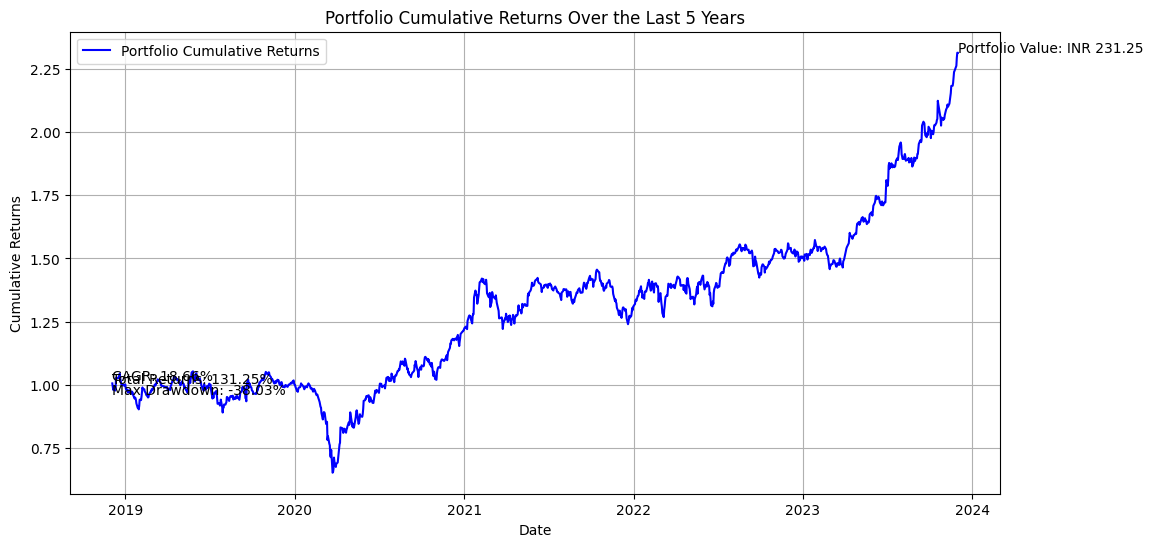

In [16]:
# Calculate portfolio values over time
portfolio_values = prices.dot(pd.Series(weights))

# Calculate daily returns
daily_returns = portfolio_values.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Calculate total portfolio value
initial_investment = 100  # 1 lakh
total_portfolio_value = initial_investment * cumulative_returns[-1]

# Calculate total returns
total_returns = (total_portfolio_value / initial_investment) - 1

# Calculate CAGR (Compound Annual Growth Rate)
n_years = len(cumulative_returns) / 252  # Assuming 252 trading days per year
cagr = (total_portfolio_value / initial_investment) ** (1 / n_years) - 1

# Calculate maximum drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

# Create a plot for cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Cumulative Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Cumulative Returns Over the Last 5 Years')
plt.legend()
plt.grid(True)

# Show the final portfolio value, returns, CAGR, and max drawdown
plt.text(cumulative_returns.index[-1], cumulative_returns[-1], f'Portfolio Value: INR {total_portfolio_value:.2f}', horizontalalignment='left')
plt.text(cumulative_returns.index[0], cumulative_returns[0], f'Total Returns: {total_returns * 100:.2f}%', horizontalalignment='left')
plt.text(cumulative_returns.index[0], cumulative_returns[0], f'CAGR: {cagr * 100:.2f}%', horizontalalignment='left', verticalalignment='bottom')
plt.text(cumulative_returns.index[0], cumulative_max.min(), f'Max Drawdown: {max_drawdown * 100:.2f}%', horizontalalignment='left', verticalalignment='top')

# Display the graph
plt.show()

# Print the final portfolio value, returns, CAGR, and max drawdown
print(f'Total Portfolio Value at the end of 5 years: INR {total_portfolio_value:.2f}')
print(f'Total Returns: {total_returns * 100:.2f}%')
print(f'CAGR (Compound Annual Growth Rate): {cagr * 100:.2f}%')
print(f'Max Drawdown: {max_drawdown * 100:.2f}%')



Total Portfolio Value at the end of 5 years: INR 231.25
Total Returns: 131.25%
CAGR (Compound Annual Growth Rate): 18.66%
Max Drawdown: -38.03%


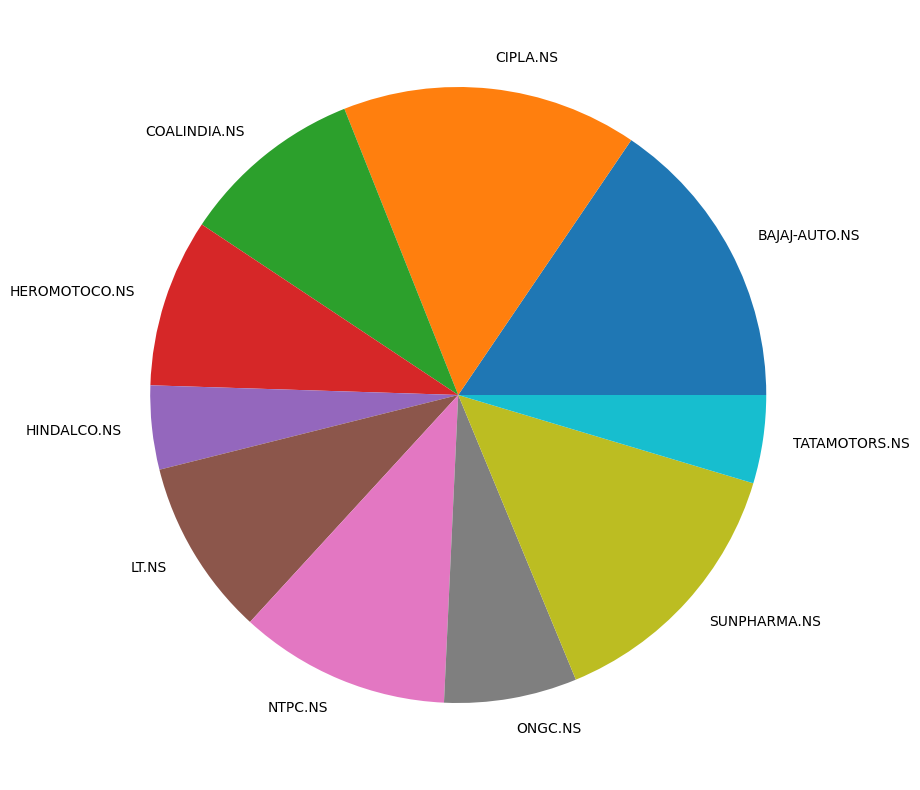

In [17]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [18]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 23.0%
Annual volatility: 19.1%
Sharpe Ratio: 1.10


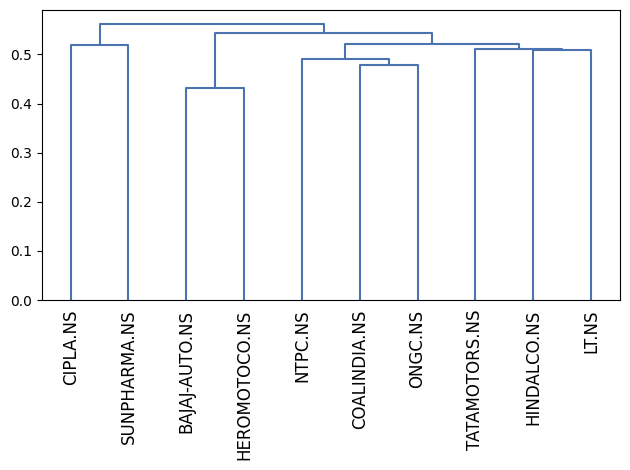

In [19]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);


In [20]:
##Sectoral Analysis

In [67]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

def calculate_returns_volatility_ratio(data):
    # Take user input for the sector
    sector_input = input("Enter the sector: ")

    # Filter data for the specified sector
    sector_data = data[data["Sector"] == sector_input].copy()

    if sector_data.empty:
        print("No data available for the specified sector.")
        return None

    # Get unique symbols in the specified sector
    unique_symbols = sector_data["Symbol"].unique()

    # Create a list to store results
    results_list = []

    # Create a list to store symbols with no data
    no_data_symbols = []

    for symbol in unique_symbols:
        # Add ".NS" to the stock symbol if it's not already there
        if not symbol.endswith(".NS"):
            stock_symbol = symbol + '.NS'  # Corrected this line

            # Specify the start and end dates
            start_date_str = '2023-01-01'
            end_date_str = '2023-03-30'
            # Convert date strings to datetime objects
            start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
            end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

            try:
                stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
            except Exception as e:
                print(f"Error fetching data for {stock_symbol}: {str(e)}")
                no_data_symbols.append(symbol)
                continue

            # Check if data is empty
            if stock_data.empty:
                print(f"No data available for {stock_symbol}")
                no_data_symbols.append(symbol)
                continue

            # Calculate daily returns
            stock_data['Returns'] = stock_data['Adj Close'].pct_change()

            # Calculate volatility
            volatility = stock_data['Returns'].std()

            # Calculate overall returns
            overall_returns = (stock_data['Adj Close'].iloc[-1] / stock_data['Adj Close'].iloc[0]) - 1

            # Calculate the ratio: returns / volatility
            ratio = overall_returns / volatility

            # Append results to the list
            results_list.append({"Symbol": symbol, "Volatility": volatility,
                                 "Overall Returns": overall_returns, "Ratio": ratio})

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results_list)

    # Sort stocks by ratio in descending order
    results_df = results_df.sort_values(by='Ratio', ascending=False)

    # Display the results
    print(f"\nResults for the {sector_input} sector:")
    print(results_df)

    # Display the top 10 results
    print("\nTop 10 Results:")
    top_30_df = results_df.head(30)
    print(top_30_df)

    # Display stocks with no data
    if no_data_symbols:
        print("\nStocks with no data:")
        print(no_data_symbols)

    return top_30_df

top_30_stocks_df = calculate_returns_volatility_ratio(merged_data)


Enter the sector: Fast Moving Consumer Goods
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANNAPURNA.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for ANNAPURNA.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AURDIS.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for AURDIS.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOLLEX.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for DOLLEX.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KCK.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for KCK.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KNAGRI.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for KNAGRI.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:


ERROR:yfinance:['KRISHIVAL.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')


No data available for KRISHIVAL.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NIRMAN.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for NIRMAN.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PROV.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for PROV.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TAPIFRUIT.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for TAPIFRUIT.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['USASEEDS.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for USASEEDS.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VASA.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data available for VASA.NS
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Results for the Fast Moving Consumer Goods sector:
         Symbol  Volatility  Overall Returns      Ratio
59          ITC    0.012331         0.168053  13.628286
21        BSHSL    0.048269         0.652295  13.513848
89   OSWALSEEDS    0.028682         0.353901  12.338873
18   BECTORFOOD    0.023753         0.246477  10.376595
96       RADICO    0.018221         0.151321   8.304582
..          ...         ...              ...        ...
91    PARAGMILK    0.017807        -0.3020

In [68]:
prices.isnull().sum()

ATFL.NS          0
BALRAMCHIN.NS    0
BANARISUG.NS     0
BCLIND.NS        0
BECTORFOOD.NS    0
BRITANNIA.NS     0
BSHSL.NS         0
CCL.NS           0
CLSEL.NS         0
COLPAL.NS        0
FOODSIN.NS       0
GODREJCP.NS      0
HINDUNILVR.NS    0
ITC.NS           0
LINC.NS          0
MANORAMA.NS      0
MEGASTAR.NS      0
MKPL.NS          0
NORBTEAEXP.NS    0
OSWALSEEDS.NS    0
PKTEA.NS         0
RADICO.NS        0
SDBL.NS          0
SKMEGGPROD.NS    0
SULA.NS          0
TRIVENI.NS       0
UMANGDAIRY.NS    0
UNITEDTEA.NS     0
VBL.NS           0
ZYDUSWELL.NS     0
dtype: int64

In [65]:
tickers = top_30_stocks_df["Symbol"]
# Extract the first 30 values from the "Symbol" column
tickers = tickers.head(30)

In [48]:
tickers

59            ITC
21          BSHSL
89     OSWALSEEDS
18     BECTORFOOD
96         RADICO
49       GODREJCP
23          CLSEL
72           LINC
104          SDBL
17         BCLIND
94          PKTEA
111          SULA
22            CCL
7            ATFL
126           VBL
74       MANORAMA
132     ZYDUSWELL
20      BRITANNIA
88     NORBTEAEXP
81           MKPL
56     HINDUNILVR
122     UNITEDTEA
15      BANARISUG
108    SKMEGGPROD
118       TRIVENI
25         COLPAL
121    UMANGDAIRY
79       MEGASTAR
40        FOODSIN
14     BALRAMCHIN
Name: Symbol, dtype: object

In [54]:
import yfinance as yf

# Assuming you already have the first_10_symbols from the previous steps
first_30_symbols = tickers.head(30).tolist()

# Adding ".NS" to each symbol
tickers_with_ns = [symbol + ".NS" for symbol in first_30_symbols]

start_date = datetime(2023, 3, 2)
end_date = datetime(2023, 4, 2)

# Download historical stock prices
ohlc = yf.download(tickers_with_ns, start=start_date, end=end_date)

# Extract adjusted close prices
prices = ohlc["Adj Close"]

# Display the result
prices


[*********************100%%**********************]  30 of 30 completed


,ATFL.NS,BALRAMCHIN.NS,BANARISUG.NS,BCLIND.NS,BECTORFOOD.NS,BRITANNIA.NS,BSHSL.NS,CCL.NS,CLSEL.NS,COLPAL.NS,...,PKTEA.NS,RADICO.NS,SDBL.NS,SKMEGGPROD.NS,SULA.NS,TRIVENI.NS,UMANGDAIRY.NS,UNITEDTEA.NS,VBL.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-02,868.078979,359.518860,2740.190430,37.616417,529.521057,4320.128418,282.000000,553.031250,153.470322,1462.969482,...,276.127991,1188.695923,117.349998,143.562180,349.303558,276.164490,57.750000,267.708252,669.205505,1449.546387
2023-03-03,874.456787,362.895538,2737.751709,38.832775,523.532166,4337.579590,267.899994,558.309570,167.757050,1466.144165,...,289.904419,1191.538940,119.400002,150.735336,356.912170,282.448822,57.750000,270.382385,677.307251,1442.868652
2023-03-06,872.961975,372.975983,2737.701904,40.548389,522.933289,4247.031738,254.500000,556.666321,178.459656,1473.665771,...,304.379700,1208.895752,122.849998,150.389038,361.655182,283.389008,57.400002,269.639618,673.617798,1476.705444
2023-03-08,892.892639,397.606018,2907.725586,40.462158,538.105164,4266.498047,241.800003,562.890808,176.667587,1467.072144,...,319.553772,1215.479370,135.149994,145.145203,356.763916,287.100250,58.349998,270.431915,673.069336,1483.432983
2023-03-09,879.389648,394.030670,2844.364990,40.598316,539.802063,4219.356445,229.750000,577.580505,176.020462,1454.373169,...,320.901459,1204.207397,140.649994,143.809509,354.441833,285.665222,58.500000,271.075714,670.950500,1474.861694
2023-03-10,876.499695,396.612854,2803.949463,40.276070,561.062744,4238.331055,218.300003,577.580505,175.920898,1462.432007,...,311.866882,1196.925537,138.000000,140.049789,349.501190,284.428162,57.500000,269.887207,669.978271,1509.744873
2023-03-13,870.819458,398.350861,2739.244873,39.009785,533.863037,4234.988281,229.199997,566.824646,165.516968,1467.267578,...,304.629272,1151.288940,138.000000,133.074509,340.805664,278.787109,56.349998,266.420776,654.397949,1496.838013
2023-03-14,861.252747,388.121460,2547.370850,38.832775,520.088501,4220.585449,240.649994,554.923462,167.806839,1465.704468,...,295.245300,1140.066772,138.899994,126.494987,340.311584,278.985016,54.250000,270.283356,654.373047,1489.113892
2023-03-15,858.711609,385.936554,2698.978760,38.061207,533.463806,4171.575684,252.649994,564.832825,168.951752,1463.799683,...,288.506836,1176.725708,138.300003,131.837769,339.965729,268.148254,54.650002,272.363220,670.900635,1486.323242


In [59]:
import pandas as pd
import numpy as np

# Assuming 'prices' is your DataFrame
# Remove stocks with more than 50 null values
prices = prices.loc[:, prices.isnull().sum() < 50]

# Treat remaining null values using forward fill
prices = prices.fillna(method='ffill')

# Check if there are still any null values
if prices.isnull().values.any():
    print("Remaining null values exist. You may consider using other methods to fill or drop them.")
else:
    print("All null values have been handled successfully.")


#Check the number of null values in each column
null_values = prices.isnull().sum()

# Display the number of null values for each column
print(null_values)
prices

All null values have been handled successfully.
ATFL.NS          0
BALRAMCHIN.NS    0
BANARISUG.NS     0
BCLIND.NS        0
BECTORFOOD.NS    0
BRITANNIA.NS     0
BSHSL.NS         0
CCL.NS           0
CLSEL.NS         0
COLPAL.NS        0
FOODSIN.NS       0
GODREJCP.NS      0
HINDUNILVR.NS    0
ITC.NS           0
LINC.NS          0
MANORAMA.NS      0
MEGASTAR.NS      0
MKPL.NS          0
NORBTEAEXP.NS    0
OSWALSEEDS.NS    0
PKTEA.NS         0
RADICO.NS        0
SDBL.NS          0
SKMEGGPROD.NS    0
SULA.NS          0
TRIVENI.NS       0
UMANGDAIRY.NS    0
UNITEDTEA.NS     0
VBL.NS           0
ZYDUSWELL.NS     0
dtype: int64


,ATFL.NS,BALRAMCHIN.NS,BANARISUG.NS,BCLIND.NS,BECTORFOOD.NS,BRITANNIA.NS,BSHSL.NS,CCL.NS,CLSEL.NS,COLPAL.NS,...,PKTEA.NS,RADICO.NS,SDBL.NS,SKMEGGPROD.NS,SULA.NS,TRIVENI.NS,UMANGDAIRY.NS,UNITEDTEA.NS,VBL.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-02,868.078979,359.518860,2740.190430,37.616417,529.521057,4320.128418,282.000000,553.031250,153.470322,1462.969482,...,276.127991,1188.695923,117.349998,143.562180,349.303558,276.164490,57.750000,267.708252,669.205505,1449.546387
2023-03-03,874.456787,362.895538,2737.751709,38.832775,523.532166,4337.579590,267.899994,558.309570,167.757050,1466.144165,...,289.904419,1191.538940,119.400002,150.735336,356.912170,282.448822,57.750000,270.382385,677.307251,1442.868652
2023-03-06,872.961975,372.975983,2737.701904,40.548389,522.933289,4247.031738,254.500000,556.666321,178.459656,1473.665771,...,304.379700,1208.895752,122.849998,150.389038,361.655182,283.389008,57.400002,269.639618,673.617798,1476.705444
2023-03-08,892.892639,397.606018,2907.725586,40.462158,538.105164,4266.498047,241.800003,562.890808,176.667587,1467.072144,...,319.553772,1215.479370,135.149994,145.145203,356.763916,287.100250,58.349998,270.431915,673.069336,1483.432983
2023-03-09,879.389648,394.030670,2844.364990,40.598316,539.802063,4219.356445,229.750000,577.580505,176.020462,1454.373169,...,320.901459,1204.207397,140.649994,143.809509,354.441833,285.665222,58.500000,271.075714,670.950500,1474.861694
2023-03-10,876.499695,396.612854,2803.949463,40.276070,561.062744,4238.331055,218.300003,577.580505,175.920898,1462.432007,...,311.866882,1196.925537,138.000000,140.049789,349.501190,284.428162,57.500000,269.887207,669.978271,1509.744873
2023-03-13,870.819458,398.350861,2739.244873,39.009785,533.863037,4234.988281,229.199997,566.824646,165.516968,1467.267578,...,304.629272,1151.288940,138.000000,133.074509,340.805664,278.787109,56.349998,266.420776,654.397949,1496.838013
2023-03-14,861.252747,388.121460,2547.370850,38.832775,520.088501,4220.585449,240.649994,554.923462,167.806839,1465.704468,...,295.245300,1140.066772,138.899994,126.494987,340.311584,278.985016,54.250000,270.283356,654.373047,1489.113892
2023-03-15,858.711609,385.936554,2698.978760,38.061207,533.463806,4171.575684,252.649994,564.832825,168.951752,1463.799683,...,288.506836,1176.725708,138.300003,131.837769,339.965729,268.148254,54.650002,272.363220,670.900635,1486.323242


In [73]:
import numpy as np
# Check for missing or zero values
if prices.isnull().values.any() or (prices == 0).any().any():
    # Handle missing or zero values
    prices = prices.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any').replace(0, np.nan).dropna(axis=0, how='any')

# Calculate returns
rets = expected_returns.returns_from_prices(prices)

# Hierarchical Risk Parity Optimization
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()

# Display the optimized weights
print(weights)

ValueError: ignored

In [72]:
#optimized weights
rets = expected_returns.returns_from_prices(prices)
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

# Convert the OrderedDict to a DataFrame
weights_df = pd.DataFrame(list(weights.items()), columns=["Asset", "Weight"])

# Multiply the weights by 100 to express them in percentage terms
weights_df["Weight"] = weights_df["Weight"] * 100

# Display the resulting DataFrame
weights_df

ValueError: ignored

In [71]:
rets

,ATFL.NS,BALRAMCHIN.NS,BANARISUG.NS,BCLIND.NS,BECTORFOOD.NS,BRITANNIA.NS,BSHSL.NS,CCL.NS,CLSEL.NS,COLPAL.NS,...,PKTEA.NS,RADICO.NS,SDBL.NS,SKMEGGPROD.NS,SULA.NS,TRIVENI.NS,UMANGDAIRY.NS,UNITEDTEA.NS,VBL.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-03,0.007347,0.009392,-0.000890,0.032336,-0.011310,0.004040,-0.050000,0.009544,0.093091,0.002170,...,0.049891,0.002392,0.017469,0.049966,0.021782,0.022756,0.000000,0.009989,0.012107,-0.004607
2023-03-06,-0.001709,0.027778,-0.000018,0.044180,-0.001144,-0.020875,-0.050019,-0.002943,0.063798,0.005130,...,0.049931,0.014567,0.028894,-0.002297,0.013289,0.003329,-0.006061,-0.002747,-0.005447,0.023451
2023-03-08,0.022831,0.066037,0.062105,-0.002127,0.029013,0.004584,-0.049902,0.011182,-0.010042,-0.004474,...,0.049852,0.005446,0.100122,-0.034868,-0.013525,0.013096,0.016550,0.002938,-0.000814,0.004556
2023-03-09,-0.015123,-0.008992,-0.021790,0.003365,0.003153,-0.011049,-0.049835,0.026097,-0.003663,-0.008656,...,0.004217,-0.009274,0.040696,-0.009202,-0.006509,-0.004998,0.002571,0.002381,-0.003148,-0.005778
2023-03-10,-0.003286,0.006553,-0.014209,-0.007937,0.039386,0.004497,-0.049837,0.000000,-0.000566,0.005541,...,-0.028154,-0.006047,-0.018841,-0.026144,-0.013939,-0.004330,-0.017094,-0.004384,-0.001449,0.023652
2023-03-13,-0.006481,0.004382,-0.023076,-0.031440,-0.048479,-0.000789,0.049931,-0.018622,-0.059140,0.003307,...,-0.023207,-0.038128,0.000000,-0.049806,-0.024880,-0.019833,-0.020000,-0.012844,-0.023255,-0.008549
2023-03-14,-0.010986,-0.025679,-0.070046,-0.004538,-0.025802,-0.003401,0.049956,-0.020996,0.013835,-0.001065,...,-0.030805,-0.009747,0.006522,-0.049442,-0.001450,0.000710,-0.037267,0.014498,-0.000038,-0.005160
2023-03-15,-0.002951,-0.005629,0.059515,-0.019869,0.025717,-0.011612,0.049865,0.017857,0.006823,-0.001300,...,-0.022823,0.032155,-0.004320,0.042237,-0.001016,-0.038844,0.007373,0.007695,0.025257,-0.001874
2023-03-16,-0.009516,0.001415,0.000184,0.001669,-0.014501,0.016050,0.049871,-0.000617,0.016794,0.001101,...,0.020761,-0.000085,-0.022415,0.009006,-0.009882,0.001845,-0.002745,-0.002182,-0.029354,-0.013814


from matplotlib import pyplot as plt
rets['ATFL.NS'].plot(kind='hist', bins=20, title='ATFL.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets['BALRAMCHIN.NS'].plot(kind='hist', bins=20, title='BALRAMCHIN.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets['BANARISUG.NS'].plot(kind='hist', bins=20, title='BANARISUG.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets['BCLIND.NS'].plot(kind='hist', bins=20, title='BCLIND.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets.plot(kind='scatter', x='ATFL.NS', y='BALRAMCHIN.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets.plot(kind='scatter', x='BALRAMCHIN.NS', y='BANARISUG.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets.plot(kind='scatter', x='BANARISUG.NS', y='BCLIND.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rets.plot(kind='scatter', x='BCLIND.NS', y='BECTORFOOD.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MKPL.NS']
  ys = series['ATFL.NS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rets.sort_values('MKPL.NS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MKPL.NS')
_ = plt.ylabel('ATFL.NS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MKPL.NS']
  ys = series['BALRAMCHIN.NS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rets.sort_values('MKPL.NS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MKPL.NS')
_ = plt.ylabel('BALRAMCHIN.NS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MKPL.NS']
  ys = series['BANARISUG.NS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rets.sort_values('MKPL.NS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MKPL.NS')
_ = plt.ylabel('BANARISUG.NS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MKPL.NS']
  ys = series['BCLIND.NS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rets.sort_values('MKPL.NS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MKPL.NS')
_ = plt.ylabel('BCLIND.NS')

from matplotlib import pyplot as plt
rets['ATFL.NS'].plot(kind='line', figsize=(8, 4), title='ATFL.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rets['BALRAMCHIN.NS'].plot(kind='line', figsize=(8, 4), title='BALRAMCHIN.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rets['BANARISUG.NS'].plot(kind='line', figsize=(8, 4), title='BANARISUG.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rets['BCLIND.NS'].plot(kind='line', figsize=(8, 4), title='BCLIND.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [64]:
# Calculate portfolio values over time
portfolio_values = prices.dot(pd.Series(weights))

# Calculate daily returns
daily_returns = portfolio_values.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Calculate total portfolio value
initial_investment = 100  # 1 lakh
total_portfolio_value = initial_investment * cumulative_returns[-1]

# Calculate total returns
total_returns = (total_portfolio_value / initial_investment) - 1


# Calculate maximum drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

# Create a plot for cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Cumulative Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Cumulative Returns Over the Last 5 Years')
plt.legend()
plt.grid(True)

# Show the final portfolio value, returns, CAGR, and max drawdown
plt.text(cumulative_returns.index[-1], cumulative_returns[-1], f'Portfolio Value: INR {total_portfolio_value:.2f}', horizontalalignment='left')
plt.text(cumulative_returns.index[0], cumulative_returns[0], f'Total Returns: {total_returns * 100:.2f}%', horizontalalignment='left')
plt.text(cumulative_returns.index[0], cumulative_max.min(), f'Max Drawdown: {max_drawdown * 100:.2f}%', horizontalalignment='left', verticalalignment='top')

# Display the graph
plt.show()

# Print the final portfolio value, returns, CAGR, and max drawdown
print(f'Total Portfolio Value at the end of 5 years: INR {total_portfolio_value:.2f}')
print(f'Total Returns: {total_returns * 100:.2f}%')
print(f'Max Drawdown: {max_drawdown * 100:.2f}%')



ValueError: ignored

In [39]:
portfolio_values

Date
2018-01-02    2316.668328
2018-01-03    2316.280353
2018-01-04    2315.619315
2018-01-05    2316.891363
2018-01-08    2325.419141
                 ...     
2019-12-24    2731.440155
2019-12-26    2724.145969
2019-12-27    2726.809870
2019-12-30    2741.572863
2019-12-31    2726.599518
Length: 488, dtype: float64

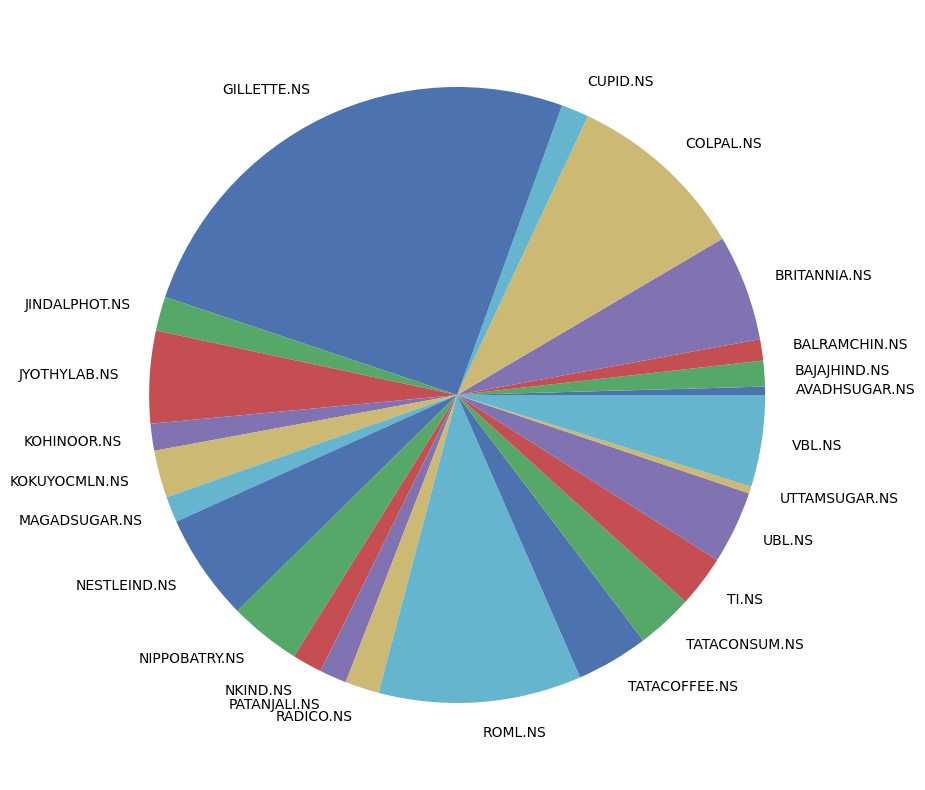

In [40]:
pd.Series(weights).plot.pie(figsize=(10, 10));

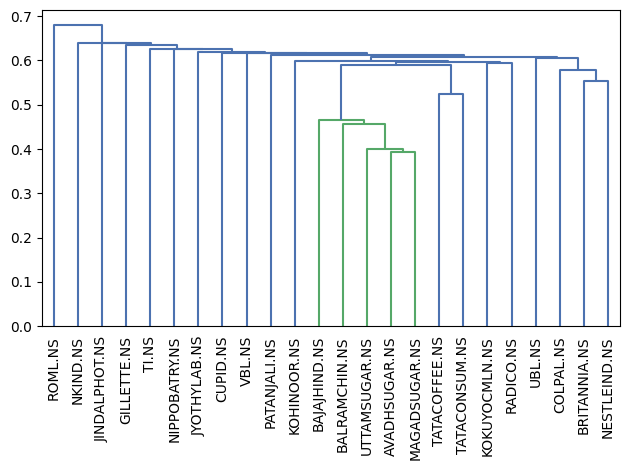

In [41]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);


In [42]:
# Specify the start and end dates for the desired period
start_date = '2020-04-01'
end_date = '2020-05-01'


In [43]:
# Filter portfolio values and index values for the specified date range
portfolio_values = portfolio_values[start_date:end_date]
index_values = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
daily_returns = portfolio_values.pct_change().dropna()
index_returns = index_values.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_index_returns = (1 + index_returns).cumprod()


[*********************100%%**********************]  1 of 1 completed


In [44]:
# Plotting Cumulative Returns
if not cumulative_returns.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio', color='blue')
    plt.plot(cumulative_index_returns.index, cumulative_index_returns, label='^NSEI', color='green', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('Portfolio vs. ^NSEI Cumulative Returns (April 2020 - May 2020)')
    plt.legend()
    plt.grid(True)

    # Add text annotations if the DataFrame is not empty
    if not cumulative_returns.empty:
        plt.text(cumulative_returns.index[-1], cumulative_returns[-1], f'Portfolio: INR {portfolio_values[-1]:.2f}', horizontalalignment='left')

    if not cumulative_index_returns.empty:
        plt.text(cumulative_index_returns.index[-1], cumulative_index_returns[-1], f'^NSEI: INR {index_values[-1]:.2f}', horizontalalignment='left')

    plt.show()
else:
    print("No data available for the specified date range.")


No data available for the specified date range.
